### Data Intergration

In [1]:
import pandas as pd

cab_data = pd.read_excel('Cab_Data1.xlsx')
cab_data_info = cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [2]:
trans_data = pd.read_csv('Transaction_ID.csv')
trans_data_info = trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [3]:
city_data = pd.read_csv('City.csv')
city_data_info = city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [4]:
city_data['Population'] = city_data['Population'].str.replace(',', '').astype(int)
city_data['Users'] = city_data['Users'].str.replace(',', '').astype(int)

In [5]:
customers_data = pd.read_csv('Customer_ID.csv')
customers_data_info = customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
trans_cab_merge = pd.merge(trans_data, cab_data, on='Transaction ID', how='left')
trancab_cus_merge = pd.merge(trans_cab_merge, customers_data, on='Customer ID', how='left')
full_merge = pd.merge(trancab_cus_merge, city_data, on='City', how='left')
full_merge.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,814885.0,24701.0
1,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,814885.0,24701.0
2,10000013,28712,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,814885.0,24701.0
3,10000014,28020,Cash,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327,814885.0,24701.0
4,10000015,27182,Card,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Male,33,8536,814885.0,24701.0


### EDA

In [7]:
full_merge.describe()

,Transaction ID,Customer ID,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month),Population,Users
count,4.400980e+05,440098.000000,359392.000000,359392.000000,359392.000000,440098.000000,440098.000000,3.593920e+05,359392.000000
mean,1.022006e+07,23619.513120,22.567254,423.443311,286.190113,35.360197,15092.181989,3.132198e+06,158365.582267
std,1.270455e+05,21195.549816,12.233526,274.378911,157.993661,12.582668,7987.309505,3.315194e+06,100850.051020
min,1.000001e+07,1.000000,1.900000,15.600000,19.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,1.011004e+07,3530.000000,12.000000,206.437500,151.200000,25.000000,8391.000000,6.712380e+05,80021.000000
50%,1.022006e+07,15168.000000,22.440000,386.360000,282.480000,33.000000,14767.000000,1.595037e+06,144132.000000
75%,1.033008e+07,43884.000000,32.960000,583.660000,413.683200,42.000000,21084.000000,8.405837e+06,302149.000000
max,1.044011e+07,60000.000000,48.000000,2048.030000,691.200000,65.000000,35000.000000,8.405837e+06,302149.000000


##### Correlation matrix

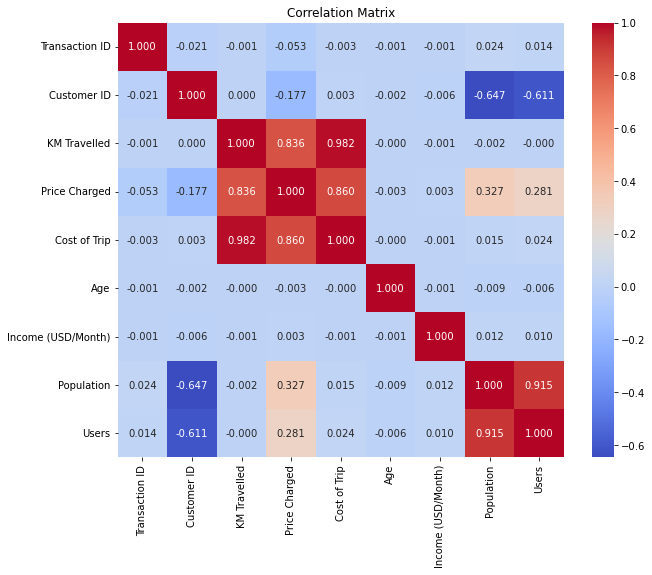

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = full_merge.corr()
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix")
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True, fmt=".3f", cmap='coolwarm')
plt.show()

##### Histogram for Numerical Variables

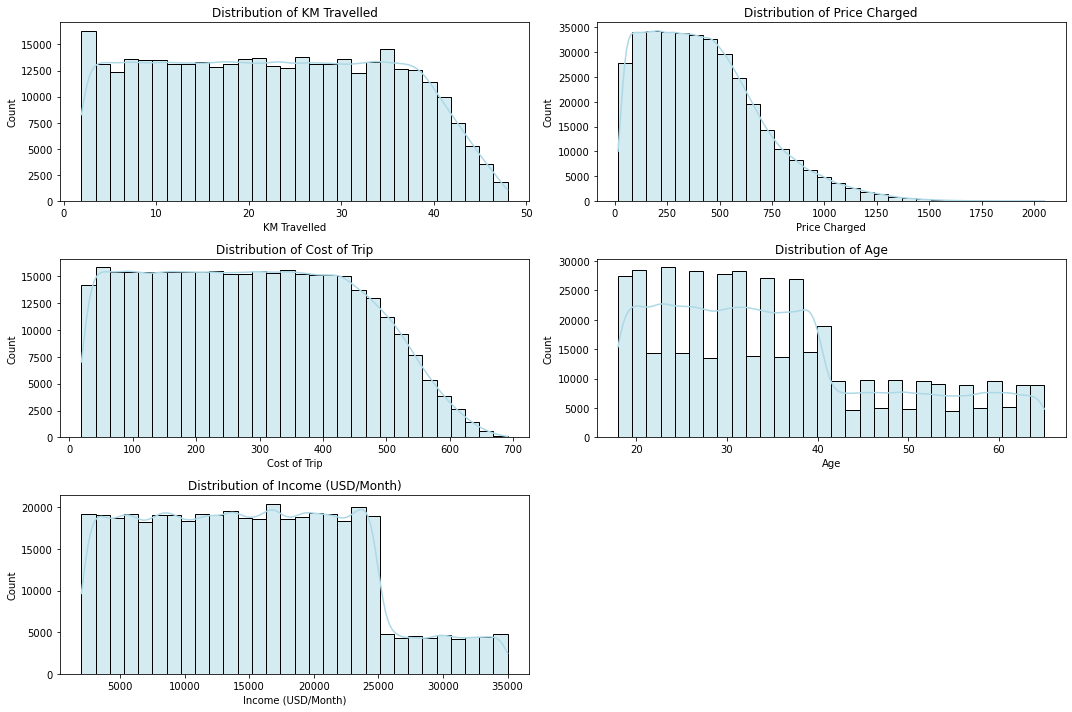

In [9]:
data = {
    'KM Travelled': full_merge['KM Travelled'],
    'Price Charged': full_merge['Price Charged'],
    'Cost of Trip': full_merge['Cost of Trip'],
    'Age': full_merge['Age'],
    'Income (USD/Month)': full_merge['Income (USD/Month)']
}

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# List of variables
variables = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)']

# Create a histogram for each variable
for i, variable in enumerate(variables):
    plt.subplot(3, 2, i + 1)  # Adjust subplot index
    sns.histplot(full_merge[variable], bins=30, color='lightblue', kde=True)
    plt.title(f'Distribution of {variable}')

# Adjust layout
plt.tight_layout()
plt.show()

##### Bar Plots for Categorical Variables

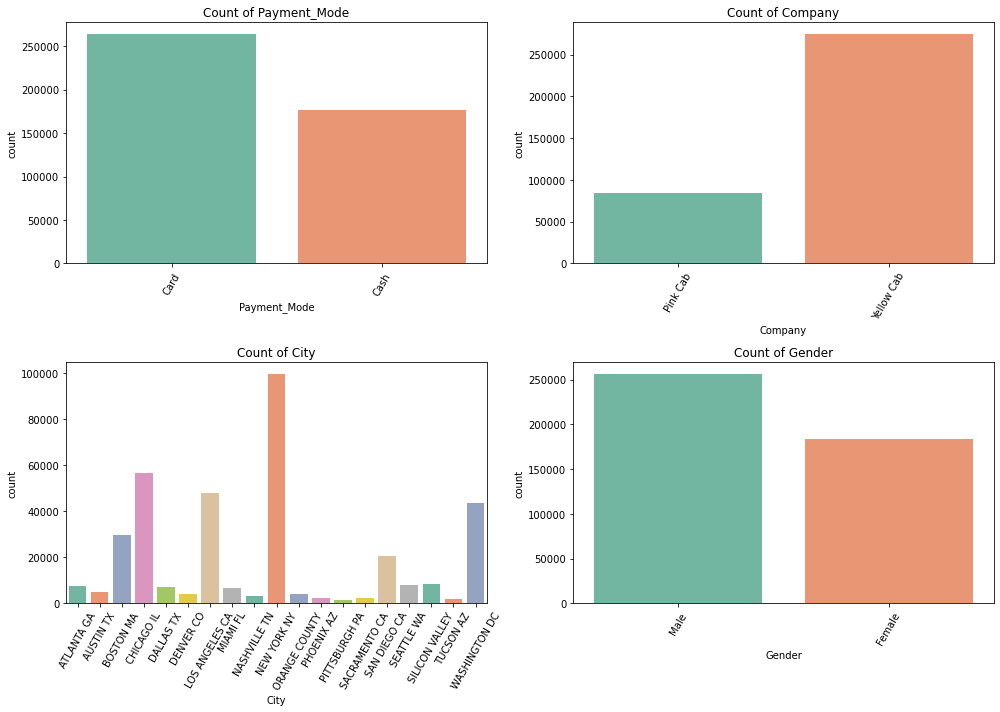

In [10]:
# List of categorical variables
categories = ['Payment_Mode', 'Company', 'City', 'Gender']

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Create a bar plot for each categorical variable
for i, category in enumerate(categories):
    plt.subplot(2, 2, i + 1)  # Adjust subplot index based on the number of categories
    sns.countplot(x=category, data=full_merge, palette='Set2')
    plt.title(f'Count of {category}')
    plt.xticks(rotation=60)  # Rotate x labels for better readability

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##### Time Series Plot

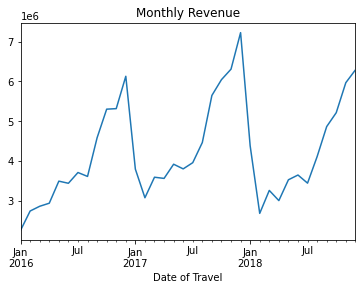

In [11]:
full_merge.set_index('Date of Travel').resample('M')['Price Charged'].sum().plot()
plt.title('Monthly Revenue')
plt.show()

##### Hypothesis 1: 
Company Yellow Cab has a higher market share in cities with a population above 1 million compared to Company Pink Cab

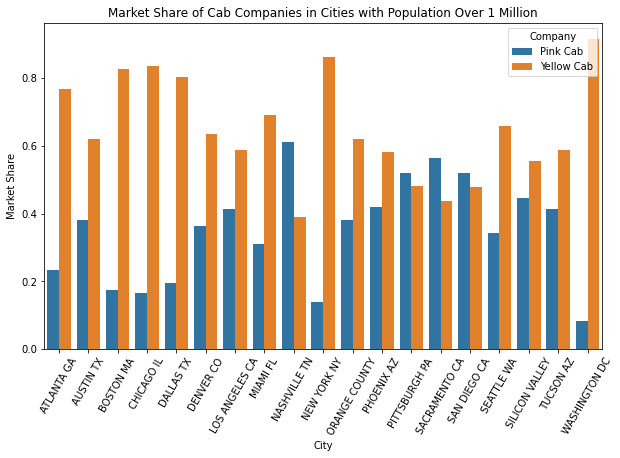

In [12]:
hyp1 = full_merge[full_merge['Population'] > 100000]
# Calculate the number of transactions per company in these cities
transaction_counts = hyp1.groupby(['City', 'Company']).size().unstack(fill_value=0)
# Calculate the total transactions in these cities
total_transactions = transaction_counts.sum(axis=1)
# Calculate market share for each company
market_share = transaction_counts.div(total_transactions, axis=0)
# Reset index to flatten the DataFrame and make it suitable for plotting
market_share.reset_index(inplace=True)
market_share_melted = pd.melt(market_share, id_vars=['City'], value_vars=['Pink Cab', 'Yellow Cab'], var_name='Company', value_name='Market Share')

# Plot the market share as a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Market Share', hue='Company', data=market_share_melted)
plt.title('Market Share of Cab Companies in Cities with Population Over 1 Million')
plt.xlabel('City')
plt.ylabel('Market Share')
plt.xticks(rotation=60)
plt.show()

##### Conclusion: 

##### Market Dominance: 
Yellow Cab appears to dominate in most cities, holding a significantly higher market share than Pink Cab. This is particularly noticeable in cities like Chicago, Los Angeles, and Washington D.C.
##### Exceptions: 
There are a few cities where Pink Cab has a comparable or slightly better presence, but these are relatively fewer.
##### Strategic Insights: 
This suggests that Yellow Cab has a stronger foothold in larger metropolitan areas, possibly due to better resource allocation, more extensive service offerings, or stronger brand recognition.

##### Hypothesis 2:
The average profitability per trip decreases as the distance increases.

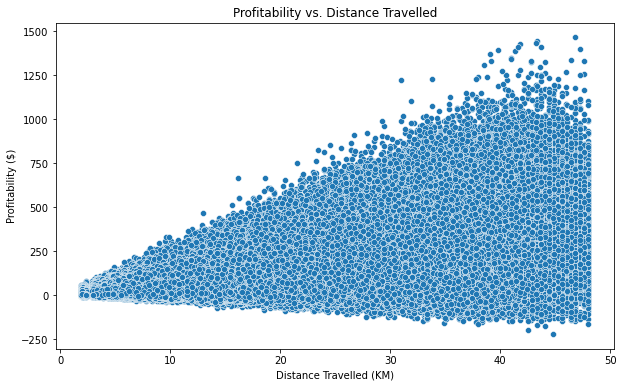

Correlation coefficient between distance travelled and profitability: 0.46276819789710993
Slope: 6.0642550286801225, Intercept: 0.39961436807783457, R-squared: 0.21415440498493865, P-value: 0.0
KM Travelled     80706
Profitability    80706
dtype: int64
Slope: 6.0642550286801225, Intercept: 0.39961436807783457, R-squared: 0.21415440498493865, P-value: 0.0


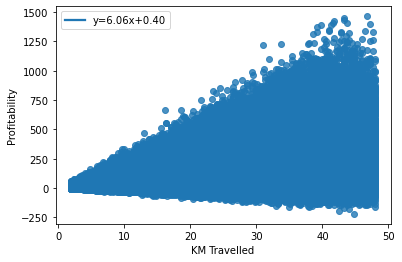

In [15]:
from scipy.stats import linregress
import numpy as np

full_merge['Profitability'] = full_merge['Price Charged'] - full_merge['Cost of Trip']

# Visualize the relationship with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='KM Travelled', y='Profitability', data=full_merge)
plt.title('Profitability vs. Distance Travelled')
plt.xlabel('Distance Travelled (KM)')
plt.ylabel('Profitability ($)')
plt.show()

# Calculate the correlation coefficient
correlation = full_merge['KM Travelled'].corr(full_merge['Profitability'])
print(f'Correlation coefficient between distance travelled and profitability: {correlation}')

df_clean = full_merge.dropna(subset=['KM Travelled', 'Profitability'])

# Run the regression again on the cleaned data
slope, intercept, r_value, p_value, std_err = linregress(df_clean['KM Travelled'], df_clean['Profitability'])
print(f'Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}, P-value: {p_value}')

# If the slope is still NaN, check for infinite values
print(full_merge[['KM Travelled', 'Profitability']].replace([np.inf, -np.inf], np.nan).isnull().sum())
# Perform a linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_clean['KM Travelled'], df_clean['Profitability'])
print(f'Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}, P-value: {p_value}')

# Adding a regression line to the plot
sns.regplot(x='KM Travelled', y='Profitability', data=df_clean, line_kws={'label':f'y={slope:.2f}x+{intercept:.2f}'})
plt.legend()
plt.show()

#### Conclusion
The data suggests that profitability increases with distance.
 #### Slope (6.064): 
 The positive slope indicates that profitability increases by approximately $6.06 for each additional kilometer traveled. This result contradicts the original hypothesis that profitability decreases as the distance increases.
 #### Intercept (0.40): 
 This value suggests that at zero kilometers (the theoretical starting point), the baseline profitability would be approximately $0.40. This value is more theoretical since no trip can have zero kilometers.
 #### R-squared (0.214): 
 This value indicates that approximately 21.4% of the variability in profitability is explained by the distance traveled. This is a moderate explanatory power, suggesting that while distance is a significant factor, other factors also play crucial roles in determining profitability.
#### P-value (0.0): 
The p-value being effectively zero suggests that the results of the regression are statistically significant. This means the positive relationship between distance traveled and profitability is highly unlikely to be due to random chance.

#### Hypothesis 3: 
Cab demand increases during certain months of the year across all cities.

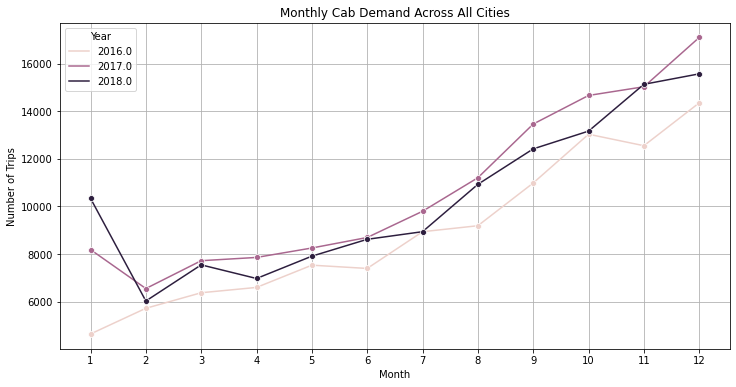

In [16]:
from statsmodels.graphics.tsaplots import month_plot

# Extract the month and year from 'Date of Travel'
full_merge['Year'] = full_merge['Date of Travel'].dt.year
full_merge['Month'] = full_merge['Date of Travel'].dt.month

# Aggregate data to count trips per month for all years
monthly_trips = full_merge.groupby(['Year', 'Month']).size().reset_index(name='Trip Count')

# Pivot data for better visualization
pivot_table = monthly_trips.pivot('Month', 'Year', 'Trip Count')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trips, x='Month', y='Trip Count', hue='Year', marker='o')
plt.title('Monthly Cab Demand Across All Cities')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(range(1, 13))  # Ensure all months are shown
plt.grid(True)
plt.legend(title='Year')
plt.show()

#### Conclusion

It is evident that there is a general increase in cab demand as the months progress each year, particularly starting to rise around mid-year and peaking towards the end of each year.

#### Seasonal Trends: 
There is a clear seasonal trend where demand increases significantly from around May or June and continues to rise until December. This could be influenced by various factors such as weather conditions, holidays, or seasonal events.
#### Yearly Growth: 
Each year shows a similar pattern, indicating consistent seasonal effects across years. The demand in later years (2017, 2018) appears to be higher than in 2016, suggesting growth in the cab service usage over the years.
#### Dips in Early Months: 
The early months, especially January and February, show the lowest demand, which could be due to post-holiday season slowdowns or colder weather conditions in many regions.

#### Hypothesis 4:
Customers with higher monthly income are more likely to be repeat users of cab services.

Correlation coefficient: 0.008474417198537936, P-value: 0.06022420975607651


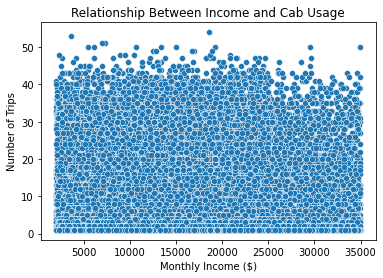

                            OLS Regression Results                            
Dep. Variable:        Number of Trips   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.531
Date:                Tue, 14 May 2024   Prob (F-statistic):             0.0602
Time:                        23:00:40   Log-Likelihood:            -1.8350e+05
No. Observations:               49171   AIC:                         3.670e+05
Df Residuals:                   49169   BIC:                         3.670e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  8.7897      0

In [17]:
from scipy.stats import pearsonr, f_oneway
import statsmodels.api as sm

# Define income brackets using quantiles or fixed ranges
full_merge['Income Bracket'] = pd.qcut(full_merge['Income (USD/Month)'], 4, labels=['Low', 'Mid-low', 'Mid-high', 'High'])

# Aggregate data to get the number of trips per customer
trips_per_customer = full_merge.groupby('Customer ID').size().reset_index(name='Number of Trips')

# Merge the trips data with income data
customer_data = full_merge[['Customer ID', 'Income (USD/Month)']].drop_duplicates().merge(trips_per_customer, on='Customer ID')

# Correlation between income and number of trips
correlation, p_value = pearsonr(customer_data['Income (USD/Month)'], customer_data['Number of Trips'])
print(f'Correlation coefficient: {correlation}, P-value: {p_value}')

# Visualizing the relationship
sns.scatterplot(x='Income (USD/Month)', y='Number of Trips', data=customer_data)
plt.xlabel('Monthly Income ($)')
plt.ylabel('Number of Trips')
plt.title('Relationship Between Income and Cab Usage')
plt.show()

# Regression analysis
X = sm.add_constant(customer_data['Income (USD/Month)'])  # adding a constant
model = sm.OLS(customer_data['Number of Trips'], X).fit()
print(model.summary())

#### Conclusion:
#### Scatter Plot: 
The visualization shows a very diffuse distribution of data points with no clear trend indicating a strong relationship between income and the number of trips. The data points are mostly clustered at lower numbers of trips regardless of income, with some sparse higher trip counts across the income range.
#### Correlation Coefficient: 
The correlation coefficient is extremely low (0.0085), suggesting that there is virtually no linear relationship between monthly income and the number of trips made by customers.
#### P-value: 
The p-value of the correlation test (0.0602) is slightly above the typical alpha level of 0.05, which means the correlation is not statistically significant at the 95% confidence level. This suggests that any observed correlation between income and number of trips could be due to random chance.
#### OLS Regression Results:

##### R-squared: 
The R-squared value is 0.000, indicating that the model explains none of the variability in the dependent variable (number of trips) around its mean.
##### F-statistic and its p-value: 
The F-statistic is 3.531 with a p-value of 0.0602, which further suggests that the model is not statistically significant.
##### Regression Coefficients: 
The coefficient for income is very small (1.07e-05), indicating a minimal change in the number of trips per unit increase in income. The confidence interval for this coefficient barely excludes zero and crosses it, implying uncertainty about the effect of income on trip frequency.

#### Hypothesis 5:
There is a difference for customers retention between two companies.

Chi-squared Test: Chi2 = 1548.7328565829998, P-value = 0.0


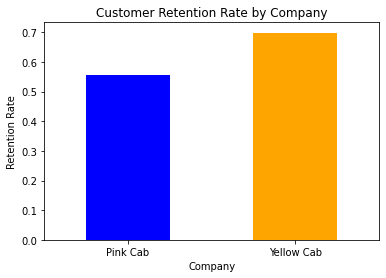

In [19]:
from scipy.stats import chi2_contingency, f_oneway
# Group by Customer ID and Company to count trips
customer_trips = full_merge.groupby(['Customer ID', 'Company']).size().reset_index(name='Number of Trips')

# Determine repeat customers: those who have more than one trip
customer_trips['Repeat Customer'] = customer_trips['Number of Trips'] > 1

# Calculate retention rates
retention_data = customer_trips.groupby('Company').agg(
    Total_Customers=('Customer ID', 'nunique'),
    Repeat_Customers=('Repeat Customer', 'sum')
)
retention_data['Retention Rate'] = retention_data['Repeat_Customers'] / retention_data['Total_Customers']

# Create a contingency table
contingency_table = customer_trips.pivot_table(index='Company', columns='Repeat Customer', aggfunc='size', fill_value=0)

# Chi-squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared Test: Chi2 = {chi2}, P-value = {p_value}")

# Visualize the retention rates
retention_data['Retention Rate'].plot(kind='bar', color=['blue', 'orange'])
plt.title('Customer Retention Rate by Company')
plt.xlabel('Company')
plt.ylabel('Retention Rate')
plt.xticks(rotation=0)
plt.show()

#### Conclusion:
#### Retention Rates:
Yellow Cab shows a substantially higher retention rate compared to Pink Cab. This suggests that Yellow Cab has been more effective in maintaining its customer base over time.
The visual comparison starkly highlights the difference in retention, which is a crucial metric for evaluating the success of a service-oriented business like cab services.
#### Chi-squared Test:
The Chi-squared statistic is extremely high (1548.73), and the P-value is 0.0, indicating that the difference in retention rates between Pink Cab and Yellow Cab is statistically significant. This result strongly suggests that the observed difference in retention rates is not due to chance but due to inherent differences in the companies' operations, services, or customer satisfaction levels.